In [1]:
from IPython.display import Image

- references
    - https://medium.com/aimonks/understanding-the-distinct-concepts-of-likelihood-and-probability-in-statistics-44cae9e1b56a

## basics

In [4]:
Image(url='https://miro.medium.com/v2/resize:fit:4800/format:webp/0*2iZ2CDfy2TZomy8W.png', width=500)

> Probability tells the tale of what might happen in a world of chance, while likelihood reveals the story of our **observations**, explaining the world we see.

- 概率（Probability）：概率描述了在一个充满偶然性的世界中可能发生的事件。它是预先定义的，基于理论或历史数据来预测未来事件的可能性。例如，掷骰子得到6的概率是1/6，这是在投掷之前就已经确定的。

- 似然（Likelihood）：似然是在观察到某些数据之后，用来解释这些**观察结果**的统计量。它是基于已有观察来评估不同假设或模型的相对可能性。例如，在已知观察到了若干次掷骰子的结果后（真实发生的被观测的 trials ），似然可以帮助我们判断骰子是否公平。

简而言之，概率是关于未来可能事件的预测，而似然是关于已经发生的观察事件的解释。概率从理论出发，似然从实际观察出发。这两者虽然紧密相关，但用途和含义有所不同。

### probability

- 事先，不需要真实的 trials 或者叫观测发生
- 来计算 $\mu=13, \sigma=4$ 的正态分布，$5\leq x\leq 10$ 的概率
- 来计算 $\mu=13, \sigma=4$ 的正态分布，$-1000\leq x\leq 1000$ 的概率

In [5]:
from scipy.stats import norm

In [7]:
norm.cdf(10, loc=13, scale=4) - norm.cdf(5, loc=13, scale=4)

0.203877220428689

In [8]:
norm.cdf(1000, loc=13, scale=4) - norm.cdf(-1000, loc=13, scale=4)

1.0

### likelihood

- 对于 $\mu=13, \sigma=4$ 的正态分布，如果观测到（observe）
    - $x=10$ 求其似然
    - $x=14$ 求其似然

In [9]:
norm.pdf(10, loc=13, scale=4)

0.07528435803870111

In [10]:
norm.pdf(14, loc=13, scale=4)

0.09666702920071232

- 显然因为 14 比 10 更靠近这个正态分布的均值，因为 $x=14$ 的似然比 $x=10$ 的似然更高；

### 对比

while probability is a measure of the chance of an event occurring given certain conditions, likelihood is a measure of how well a set of data supports a particular model or parameter values. Probability is used more generally to describe the likelihood of events, while likelihood is a specific term used in the context of statistical models and inference.

## examples

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Simulate coin flips, 1 for heads and 0 for tails
# Assume true probability of heads is 0.6
true_p_heads = 0.6
flips = np.random.binomial(1, true_p_heads, 100)

In [13]:
# Count the number of heads
n_heads = np.sum(flips)

# Total number of flips
n_flips = len(flips)

# Probability of observing n_heads in n_flips
probability = n_heads / n_flips
print(f"Probability of heads: {probability}")

Probability of heads: 0.63


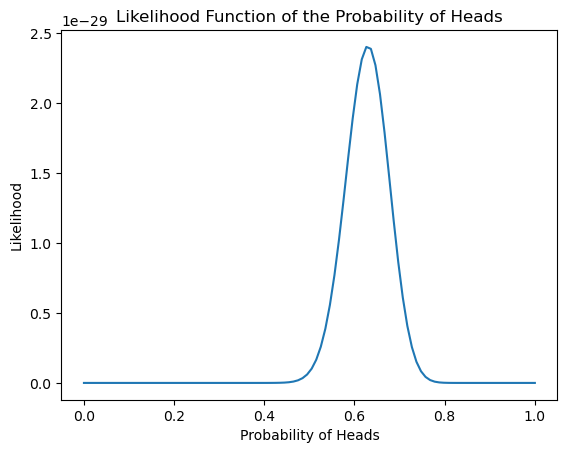

In [14]:
# Define a range of possible values for the probability of heads
p_heads_range = np.linspace(0, 1, 100)

# Calculate the likelihood for each value of p_heads
likelihoods = [(p ** n_heads) * ((1 - p) ** (n_flips - n_heads)) for p in p_heads_range]

# Plot the likelihood function
plt.plot(p_heads_range, likelihoods)
plt.xlabel('Probability of Heads')
plt.ylabel('Likelihood')
plt.title('Likelihood Function of the Probability of Heads')
plt.show()

- 最大似然估计的角度，求 $p$

$$
\arg\max_{p} p^{k}(1-p)^{n-k}=\arg\max_{p} \log(p^{k}(1-p)^{n-k})
$$

- 其一阶导数

$$
\frac{k}{p}-\frac{n-k}{1-p}
$$

- 令其为 0 得，

$$
p=\frac{k}{n}
$$